# Исследование об определении перспективного тарифа для телеком-компании

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt   

In [2]:
data_calls = pd.read_csv('/datasets/calls.csv')

In [3]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [5]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
data_calls.duplicated().sum()

0

In [7]:
data_internet = pd.read_csv('/datasets/internet.csv')

In [8]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [9]:
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [10]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
data_internet.duplicated().sum()

0

In [12]:
data_messages = pd.read_csv('/datasets/messages.csv')

In [13]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [14]:
data_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [15]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [16]:
data_messages.duplicated().sum()

0

In [17]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [18]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [19]:
data_tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [20]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [21]:
data_tariffs.duplicated().sum()

0

In [22]:
data_users = pd.read_csv('/datasets/users.csv')

In [23]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [24]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [25]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
data_users.duplicated().sum()

0

### Вывод:

В датафрейме data_users встречаются пропуски. Столбец call_date в датафрейме data_calls, столбец session_date в датафрейме data_internet и столбцы reg_date, churn_date в датафрейме data_users имеют неверный тип.

## Предобработка данных

Добавим столбец с включенным количеством гигабайт для каждого тарифа:

In [27]:
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})
data_tariffs['gb_included'] = data_tariffs['mb_per_month_included'] / 1024
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


Приведем данные в столбцах с датами к нужному типу:

In [28]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [29]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [30]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [31]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [32]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

In [33]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Заменим пропуски в столбце churn_date датафрейма data_users на "active"

In [34]:
data_users['churn_date'] = data_users['churn_date'].fillna('active')

In [35]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Добавим столбец с месяцами в датафрейм data_calls:

In [36]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Округлим длительность звонка в большую сторону:

In [37]:
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Создадим сводную таблицу с длительностью звонков по месяцам:

In [38]:
data_calls_pivot_sum = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index().astype('int')
data_calls_pivot_sum = data_calls_pivot_sum.rename(columns={'duration' :'duration_calls'})
data_calls_pivot_sum.head()

,user_id,month,duration_calls
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


Создадим сводную таблицу с количеством сделанных звонков:

In [39]:
data_calls_pivot_count = data_calls.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
data_calls_pivot_count = data_calls_pivot_count.rename(columns={'id' :'amount_of_calls'})
data_calls_pivot_count.head()

,user_id,month,amount_of_calls
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


Добавим столбец с месяцами в датафрейм data_internet:

In [40]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Нулевых интернет-сессий: 0.13 %


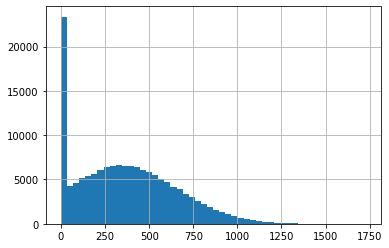

In [41]:
# Комментарий ревьюера 2
temp = data_internet.copy()
temp['mb_used'].hist(bins = 50)
print('Нулевых интернет-сессий:',round(temp['mb_used'].value_counts().sort_index()[0]/temp['mb_used'].count(),2), '%')

Создадим сводную таблицу с использованным трафиком, так же добавим столбец с количеством израсходованных гигабайт, с округлением в большую сторону:

In [42]:
data_internet_pivot = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
data_internet_pivot['gb_used'] = np.ceil(data_internet_pivot['mb_used'] / 1024).astype('int')
data_internet_pivot.head()

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


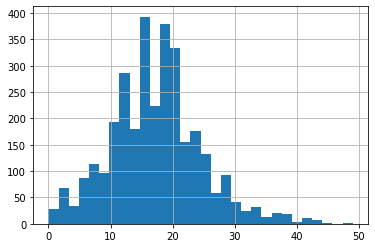

In [43]:
data_internet_pivot['gb_used'].hist(bins=30)
plt.show()

На гистограмме видно отсутсвие аномалий по интернет трафику.

Добавим столбец с месяцами в датафрейм data_messages:

In [44]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Создадим сводную таблицу с количеством отправленных сообщений:

In [45]:
data_messages_pivot = data_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index().astype('int')
data_messages_pivot = data_messages_pivot.rename(columns={'id' :'ammount_of_messages'})
data_messages_pivot.head()


,user_id,month,ammount_of_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Методом merge, создадим финальный датафрейм:

In [46]:
data_final = (data_users[['user_id', 'tariff', 'city']]
              .merge(data_calls_pivot_sum, on=['user_id'], how='left')
              .merge(data_calls_pivot_count, on=['user_id', 'month'], how='left')
              .merge(data_internet_pivot, on=['user_id', 'month'], how='left')
              .merge(data_messages_pivot, on=['user_id', 'month'], how='left')
)
data_final.head()              

,user_id,tariff,city,month,duration_calls,amount_of_calls,mb_used,gb_used,ammount_of_messages
0,1000,ultra,Краснодар,5.0,159.0,22.0,2253.49,3.0,22.0
1,1000,ultra,Краснодар,6.0,172.0,43.0,23233.77,23.0,60.0
2,1000,ultra,Краснодар,7.0,340.0,47.0,14003.64,14.0,75.0
3,1000,ultra,Краснодар,8.0,408.0,52.0,14055.93,14.0,81.0
4,1000,ultra,Краснодар,9.0,466.0,58.0,14568.91,15.0,57.0


In [47]:
data_final = data_final.merge(data_tariffs, on=['tariff'])
data_final.head()

,user_id,tariff,city,month,duration_calls,amount_of_calls,mb_used,gb_used,ammount_of_messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included
0,1000,ultra,Краснодар,5.0,159.0,22.0,2253.49,3.0,22.0,1000,30720,3000,1950,150,1,1,30.0
1,1000,ultra,Краснодар,6.0,172.0,43.0,23233.77,23.0,60.0,1000,30720,3000,1950,150,1,1,30.0
2,1000,ultra,Краснодар,7.0,340.0,47.0,14003.64,14.0,75.0,1000,30720,3000,1950,150,1,1,30.0
3,1000,ultra,Краснодар,8.0,408.0,52.0,14055.93,14.0,81.0,1000,30720,3000,1950,150,1,1,30.0
4,1000,ultra,Краснодар,9.0,466.0,58.0,14568.91,15.0,57.0,1000,30720,3000,1950,150,1,1,30.0


In [48]:
data_final.isna().mean()

user_id                  0.000000
tariff                   0.000000
city                     0.000000
month                    0.002514
duration_calls           0.002514
amount_of_calls          0.002514
mb_used                  0.005971
gb_used                  0.005971
ammount_of_messages      0.158391
messages_included        0.000000
mb_per_month_included    0.000000
minutes_included         0.000000
rub_monthly_fee          0.000000
rub_per_gb               0.000000
rub_per_message          0.000000
rub_per_minute           0.000000
gb_included              0.000000
dtype: float64

Пропуски в столбце ammount_messages скорее всего иллюстрируют отсутствие пересланных сообщений. Заменим значения на 0. Пропуски в остальных столбцах составляют несущественную часть данных. Удалим их.

In [49]:
data_final['ammount_of_messages'] = data_final['ammount_of_messages'].fillna(0)

In [50]:
data_final.dropna(subset=['month', 'duration_calls', 'amount_of_calls', 'mb_used', 'gb_used'], axis=0, inplace=True)
data_final.isna().sum()

user_id                  0
tariff                   0
city                     0
month                    0
duration_calls           0
amount_of_calls          0
mb_used                  0
gb_used                  0
ammount_of_messages      0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
gb_included              0
dtype: int64

Добавим столбцы с остатками для каждой услуги:

In [52]:
data_final['calls_overrun'] = abs(data_final['duration_calls'] - data_final['minutes_included'])
data_final.head()

,user_id,tariff,city,month,duration_calls,amount_of_calls,mb_used,gb_used,ammount_of_messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_overrun
0,1000,ultra,Краснодар,5.0,159.0,22.0,2253.49,3.0,22.0,1000,30720,3000,1950,150,1,1,30.0,2841.0
1,1000,ultra,Краснодар,6.0,172.0,43.0,23233.77,23.0,60.0,1000,30720,3000,1950,150,1,1,30.0,2828.0
2,1000,ultra,Краснодар,7.0,340.0,47.0,14003.64,14.0,75.0,1000,30720,3000,1950,150,1,1,30.0,2660.0
3,1000,ultra,Краснодар,8.0,408.0,52.0,14055.93,14.0,81.0,1000,30720,3000,1950,150,1,1,30.0,2592.0
4,1000,ultra,Краснодар,9.0,466.0,58.0,14568.91,15.0,57.0,1000,30720,3000,1950,150,1,1,30.0,2534.0


In [53]:
data_final['mes_overrun'] = abs(data_final['ammount_of_messages'] - data_final['messages_included'])
data_final.head()

,user_id,tariff,city,month,duration_calls,amount_of_calls,mb_used,gb_used,ammount_of_messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_overrun,mes_overrun
0,1000,ultra,Краснодар,5.0,159.0,22.0,2253.49,3.0,22.0,1000,30720,3000,1950,150,1,1,30.0,2841.0,978.0
1,1000,ultra,Краснодар,6.0,172.0,43.0,23233.77,23.0,60.0,1000,30720,3000,1950,150,1,1,30.0,2828.0,940.0
2,1000,ultra,Краснодар,7.0,340.0,47.0,14003.64,14.0,75.0,1000,30720,3000,1950,150,1,1,30.0,2660.0,925.0
3,1000,ultra,Краснодар,8.0,408.0,52.0,14055.93,14.0,81.0,1000,30720,3000,1950,150,1,1,30.0,2592.0,919.0
4,1000,ultra,Краснодар,9.0,466.0,58.0,14568.91,15.0,57.0,1000,30720,3000,1950,150,1,1,30.0,2534.0,943.0


In [54]:
data_final['gb_overrun'] = abs(data_final['gb_used'] - data_final['gb_included'])
data_final.head()

,user_id,tariff,city,month,duration_calls,amount_of_calls,mb_used,gb_used,ammount_of_messages,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_overrun,mes_overrun,gb_overrun
0,1000,ultra,Краснодар,5.0,159.0,22.0,2253.49,3.0,22.0,1000,30720,3000,1950,150,1,1,30.0,2841.0,978.0,27.0
1,1000,ultra,Краснодар,6.0,172.0,43.0,23233.77,23.0,60.0,1000,30720,3000,1950,150,1,1,30.0,2828.0,940.0,7.0
2,1000,ultra,Краснодар,7.0,340.0,47.0,14003.64,14.0,75.0,1000,30720,3000,1950,150,1,1,30.0,2660.0,925.0,16.0
3,1000,ultra,Краснодар,8.0,408.0,52.0,14055.93,14.0,81.0,1000,30720,3000,1950,150,1,1,30.0,2592.0,919.0,16.0
4,1000,ultra,Краснодар,9.0,466.0,58.0,14568.91,15.0,57.0,1000,30720,3000,1950,150,1,1,30.0,2534.0,943.0,15.0


Создадим функцию для подсчета помесячной выручки:

In [55]:
def income(data_final):
    income_min = 0
    income_mes = 0
    income_internet = 0
    if data_final['calls_overrun'] > 0:
        income_min = data_final['calls_overrun'] * data_final['rub_per_minute']
    if data_final['mes_overrun'] > 0:
        income_mes = data_final['mes_overrun'] * data_final['rub_per_message']
    if data_final['gb_overrun'] > 0:
        income_internet = data_final['gb_overrun'] * data_final['rub_per_gb']
    if data_final['tariff'] == 'ultra':
        income_tariff = 1950
    if data_final['tariff'] == 'smart':
        income_tariff = 550
    return income_min + income_mes + income_internet + income_tariff
data_final['income'] = data_final.apply(income, axis=1)
data_final.head()

,user_id,tariff,city,month,duration_calls,amount_of_calls,mb_used,gb_used,ammount_of_messages,messages_included,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,calls_overrun,mes_overrun,gb_overrun,income
0,1000,ultra,Краснодар,5.0,159.0,22.0,2253.49,3.0,22.0,1000,...,3000,1950,150,1,1,30.0,2841.0,978.0,27.0,9819.0
1,1000,ultra,Краснодар,6.0,172.0,43.0,23233.77,23.0,60.0,1000,...,3000,1950,150,1,1,30.0,2828.0,940.0,7.0,6768.0
2,1000,ultra,Краснодар,7.0,340.0,47.0,14003.64,14.0,75.0,1000,...,3000,1950,150,1,1,30.0,2660.0,925.0,16.0,7935.0
3,1000,ultra,Краснодар,8.0,408.0,52.0,14055.93,14.0,81.0,1000,...,3000,1950,150,1,1,30.0,2592.0,919.0,16.0,7861.0
4,1000,ultra,Краснодар,9.0,466.0,58.0,14568.91,15.0,57.0,1000,...,3000,1950,150,1,1,30.0,2534.0,943.0,15.0,7677.0


In [56]:
data_final.isna().sum()

user_id                  0
tariff                   0
city                     0
month                    0
duration_calls           0
amount_of_calls          0
mb_used                  0
gb_used                  0
ammount_of_messages      0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
gb_included              0
calls_overrun            0
mes_overrun              0
gb_overrun               0
income                   0
dtype: int64

## Анализ данных

### Столбчатые диаграммы

Создадим датафрейм для каждого тарифа:

In [57]:
data_ultra = data_final.query('tariff == "ultra"')
data_smart = data_final.query('tariff == "smart"')

Построим столбчатые диаграммы для среднего каждой услуги (длительности звонков, количества сообщений и использованного трафика):

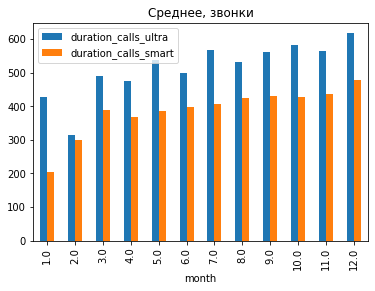

In [58]:
mean_ultra_calls = data_ultra.groupby('month')['duration_calls'].mean().reset_index()
mean_smart_calls = data_smart.groupby('month')['duration_calls'].mean().reset_index()
both_calls_mean = mean_ultra_calls.merge(mean_smart_calls, on='month')
both_calls_mean = both_calls_mean.rename(columns={'duration_calls_x': 'duration_calls_ultra', 'duration_calls_y': 'duration_calls_smart'})
both_calls_mean.plot(kind='bar', x='month')
plt.title('Среднее, звонки')
plt.show()

Среднее значение в каждом месяце тарифа "Ультра" выше среднего тарифа "Смарт". Встречается аномальное значение в феврале где значения равны.

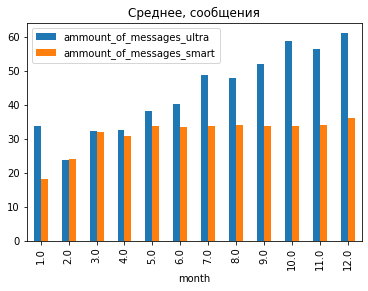

In [59]:
mean_ultra_messages = data_ultra.groupby('month')['ammount_of_messages'].mean().reset_index()
mean_smart_messages = data_smart.groupby('month')['ammount_of_messages'].mean().reset_index()
both_messages_mean = mean_ultra_messages.merge(mean_smart_messages, on='month')
both_messages_mean = both_messages_mean.rename(columns={'ammount_of_messages_x': 'ammount_of_messages_ultra', 'ammount_of_messages_y': 'ammount_of_messages_smart'})
both_messages_mean.plot(kind='bar', x='month')
plt.title('Среднее, сообщения')
plt.show()

Среднее значение количества сообщений тарифа "Ультра" выше тарифа "Смарт".

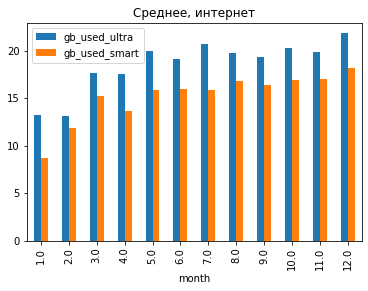

In [60]:
mean_ultra_internet = data_ultra.groupby('month')['gb_used'].mean().reset_index()
mean_smart_internet = data_smart.groupby('month')['gb_used'].mean().reset_index()
both_internet_mean = mean_ultra_internet.merge(mean_smart_internet, on='month')
both_internet_mean = both_internet_mean.rename(columns={'gb_used_x': 'gb_used_ultra', 'gb_used_y': 'gb_used_smart'})
both_internet_mean.plot(kind='bar', x='month')
plt.title('Среднее, интернет')
plt.show()

Средние значения использованного трафика тарифа "Ультра" выше тарифа "Смарт". Однако средние значения этой услуги ближе всего у двух тарифов.

Создадим столбчатые диграммы для дисперсии каждой услуги:

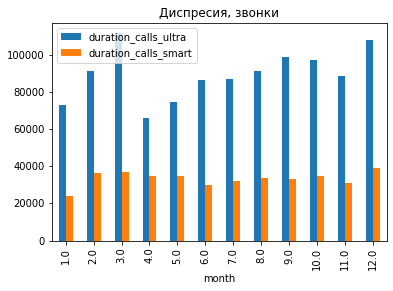

In [61]:
var_ultra_calls = data_ultra.groupby('month')['duration_calls'].agg('var').reset_index()
var_smart_calls = data_smart.groupby('month')['duration_calls'].agg('var').reset_index()
both_calls_var = var_ultra_calls.merge(var_smart_calls, on='month')
both_calls_var = both_calls_var.rename(columns={'duration_calls_x': 'duration_calls_ultra', 'duration_calls_y': 'duration_calls_smart'})
both_calls_var.plot(kind='bar', x='month')
plt.title('Диспресия, звонки')
plt.show()

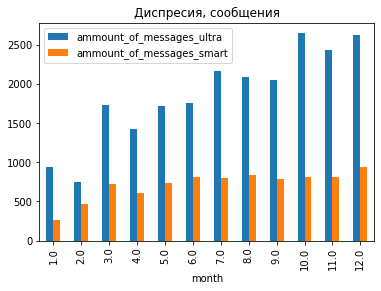

In [62]:
var_ultra_messages = data_ultra.groupby('month')['ammount_of_messages'].agg('var').reset_index()
var_smart_messages = data_smart.groupby('month')['ammount_of_messages'].agg('var').reset_index()
both_messages_var = var_ultra_messages.merge(var_smart_messages, on='month')
both_messages_var = both_messages_var.rename(columns={'ammount_of_messages_x': 'ammount_of_messages_ultra', 'ammount_of_messages_y': 'ammount_of_messages_smart'})
both_messages_var.plot(kind='bar', x='month')
plt.title('Диспресия, сообщения')
plt.show()

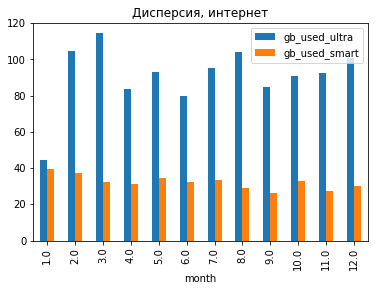

In [63]:
var_ultra_internet = data_ultra.groupby('month')['gb_used'].agg('var').reset_index()
var_smart_internet = data_smart.groupby('month')['gb_used'].agg('var').reset_index()
both_internet_var = var_ultra_internet.merge(var_smart_internet, on='month')
both_internet_var = both_internet_var.rename(columns={'gb_used_x': 'gb_used_ultra', 'gb_used_y': 'gb_used_smart'})
both_internet_var.plot(kind='bar', x='month')
plt.title('Дисперсия, интернет')
plt.show()

Создадим столбчатые диграммы для стандартного отклонения каждой услуги:

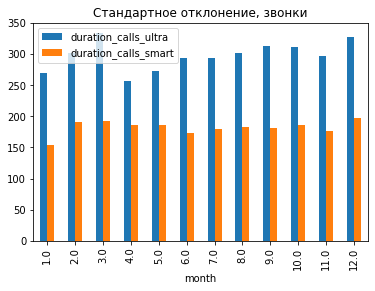

In [64]:
std_ultra_calls = data_ultra.groupby('month')['duration_calls'].agg('std').reset_index()
std_smart_calls = data_smart.groupby('month')['duration_calls'].agg('std').reset_index()
both_calls_std = std_ultra_calls.merge(std_smart_calls, on='month')
both_calls_std = both_calls_std.rename(columns={'duration_calls_x': 'duration_calls_ultra', 'duration_calls_y': 'duration_calls_smart'})
both_calls_std.plot(kind='bar', x='month')
plt.title('Стандартное отклонение, звонки')
plt.show()

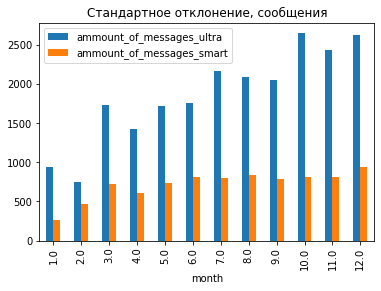

In [65]:
std_ultra_messages = data_ultra.groupby('month')['ammount_of_messages'].agg('var').reset_index()
std_smart_messages = data_smart.groupby('month')['ammount_of_messages'].agg('var').reset_index()
both_messages_std = std_ultra_messages.merge(std_smart_messages, on='month')
both_messages_std = both_messages_std.rename(columns={'ammount_of_messages_x': 'ammount_of_messages_ultra', 'ammount_of_messages_y': 'ammount_of_messages_smart'})
both_messages_std.plot(kind='bar', x='month')
plt.title('Стандартное отклонение, сообщения')
plt.show()

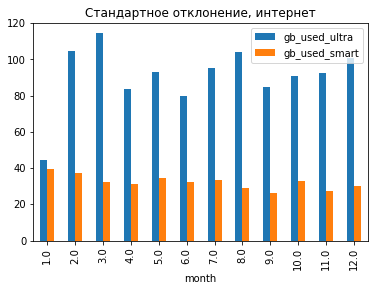

In [66]:
std_ultra_internet = data_ultra.groupby('month')['gb_used'].agg('var').reset_index()
std_smart_internet = data_smart.groupby('month')['gb_used'].agg('var').reset_index()
both_internet_std = std_ultra_internet.merge(std_smart_internet, on='month')
both_internet_std = both_internet_std.rename(columns={'gb_used_x': 'gb_used_ultra', 'gb_used_y': 'gb_used_smart'})
both_internet_std.plot(kind='bar', x='month')
plt.title('Стандартное отклонение, интернет')
plt.show()

Дисперсия и стандартное отклонение всех услуг тарифа "Ультра" в основном значительно выше дисперсии и стандартного отклонения тарифа "Смарт", что говорит о более широком распределении и большей рассеяности данных первой выборки.

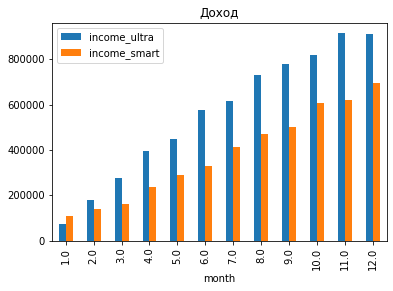

In [67]:
sum_income_ultra = data_ultra.groupby('month')['income'].sum().reset_index()
sum_income_smart = data_smart.groupby('month')['income'].sum().reset_index()
sum_both_income = sum_income_ultra.merge(sum_income_smart, on='month')
sum_both_income = sum_both_income.rename(columns={'income_x': 'income_ultra', 'income_y': 'income_smart'})
sum_both_income.plot(kind='bar', x='month')
plt.title('Доход')
plt.show()

Наблюдается явная тенденция увеличения дохода в течении года, у обоих тарифов. 

### Гистограммы распределения каждой услуги:

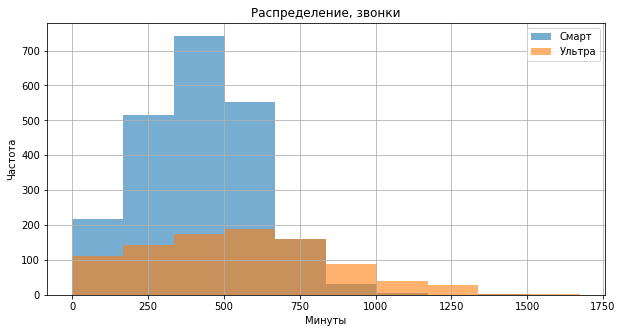

In [68]:
calls=pd.DataFrame({
    'Смарт':data_smart['duration_calls'],
    'Ультра':data_ultra['duration_calls']
})
calls.plot(kind='hist', bins=10, grid=True, figsize=(10, 5), alpha=0.6)
plt.title('Распределение, звонки')
plt.xlabel('Минуты')
plt.ylabel('Частота')
plt.show()

Оба распределения стремятся к нормальному. Можно понять, что пользователи тарифа "Смарт" чаще используют от 300 до 500 минут, а поьзователи тарифа "Ультра" от 500 до 700 минут. Однако пользователи тарифа смарт совершают звонки значительно чаще.

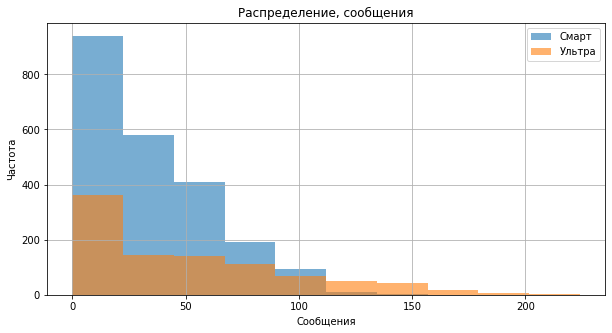

In [69]:
messages=pd.DataFrame({
    'Смарт':data_smart['ammount_of_messages'],
    'Ультра':data_ultra['ammount_of_messages']
})
messages.plot(kind='hist', bins=10, grid=True, figsize=(10, 5), alpha=0.6)
plt.title('Распределение, сообщения')
plt.xlabel('Сообщения')
plt.ylabel('Частота')
plt.show()

Эта гистограмма скошена вправо. Она демонстрирует, что пользователи тарифа смарт и ультра чаще отправляют от 0 до 25 сообщений. Гистограмма тарифа ультра имеет более длинный хвост после 110 сообщений, но крайне малую частоту.

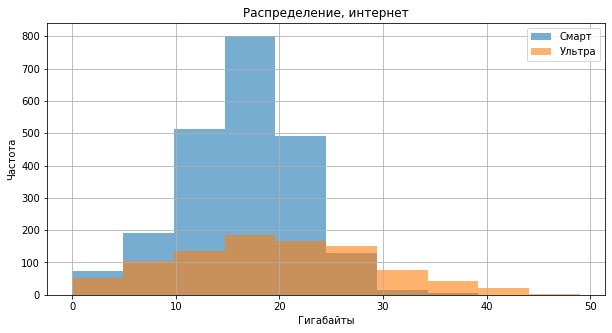

In [70]:
internet=pd.DataFrame({
    'Смарт':data_smart['gb_used'],
    'Ультра':data_ultra['gb_used']
})
internet.plot(kind='hist', bins=10, grid=True, figsize=(10, 5), alpha=0.6)
plt.title('Распределение, интернет')
plt.xlabel('Гигабайты')
plt.ylabel('Частота')
plt.show()

Оба распределения стремятся к нормальному. Пользователи тарифа "Смарт" и ультра чаще используют от 15 до 20 гб интернета. Но частота тарифа "Смарт" значительно выше тарифа "Ультра".

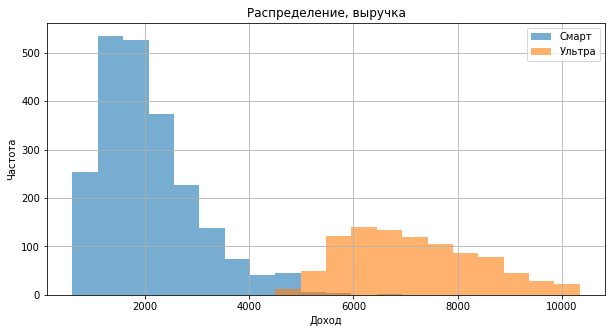

In [71]:
income=pd.DataFrame({
    'Смарт':data_smart['income'],
    'Ультра':data_ultra['income']
})
income.plot(kind='hist', bins=20, grid=True, figsize=(10, 5), alpha=0.6)
plt.title('Распределение, выручка')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

Оба распределения стремятся к нормальному. Пик частоты дохода у тарифа "Смарт" находится в районе 1000, а тарифа "Ультра" в районе 6000. Однако пик тарифа "Смарт" значительно выше пика тарифа "Ультра".

## Проверка гипотез

### Гипотеза №1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

У нас есть нулевая гипотеза Н0 - средняя выручка пользователей тарифов "Ультра" и "Смарт" равны, т.е. средние значения равны. Альтернативной гипотезой же является Н1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" не равны, т.е. средние значения не равны.

In [72]:
alpha = .05
results = st.ttest_ind(
    data_final.query('tariff == "ultra"')['income'], 
    data_final.query('tariff == "smart"')['income']
)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
        

p-значение:  0.0
Отвергаем нулевую гипотезу


Средняя выручка пользователей тарифов "Ультра" и "Смарт" не равны.

### Гипотеза №2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

У нас есть нулевая гипотеза Н0 - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, т. е. средние значения равны. Альтернативной же гипотезой является Н1 - средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов, т. е. средние значения не равны.

In [73]:
alpha = .05
results = st.ttest_ind(
    data_final.query('city == "Москва"')['income'],
    data_final.query('city != "Москва"')['income']
)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.013756159422775563
Отвергаем нулевую гипотезу


Средняя выручка пользователей из Москвы не равна выручке пользователей из других регионов.

## Общий вывод

### Предобработка данных

При предобработке данных были выявлены и устранены пропуски в столбцах. Все данные приведены к нужным типам. Посчитано для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя 

### Цели исследования

Целью исследования был предварительный анализ тарифов на небольшой выборке клиентов. Нужно было проанализировать поведение клиентов и сделать вывод — какой тариф лучше, описать поведение клиентов оператора, исходя из выборки. Проверить, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения. Затем проверить две гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Исследование

В процессе иследования были найдены дисперсия стандартное отклонение и среднее значение услуг каждого из тарифов. Так же были построены гистограммы распределения услуг каждого из тарифов. Затем были проверены две гипотезы.